In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [381]:
start_date='2023-01-01'
end_date='2023-03-12'
freq='H'
columns=['Y1','Y2','Y3','Y4','Y5']
start_time = '09:00'
end_time = '17:00'
i=2

In [382]:
#atificaially generating timeseries data
def generate_timeseries(start_date, end_date, freq, columns):
  
    time_index = pd.date_range(start=start_date, end=end_date, freq=freq)
    signals = {}
    for column in columns:
        signals[column] = np.zeros(len(time_index))
        
    return(pd.DataFrame(signals, index=time_index))

In [383]:
base_ts = generate_timeseries(start_date=start_date,end_date=end_date, freq=freq, columns=columns)

In [384]:
working_hours_freq = pd.date_range(start=start_time, end=end_time, freq='1H').strftime('%H:%M:%S').tolist()
working_hours_rng = base_ts[base_ts.index.strftime('%H:%M:%S').isin(working_hours_freq)]
non_working_hours=base_ts[~base_ts.index.strftime('%H:%M:%S').isin(working_hours_freq)]

In [385]:
for col in base_ts.columns:
    print(i)
    base_ts[col][base_ts.index.strftime('%H:%M:%S').isin(working_hours_freq)]=  \
       np.round(np.random.normal(loc=(5+i)*i, scale=(1.25*abs(i)), size=(len(working_hours_rng),1)),3) 
    base_ts[col][~base_ts.index.strftime('%H:%M:%S').isin(working_hours_freq)]=  \
         np.round(np.random.normal(loc=6, scale=2, size=(len(non_working_hours),1)) - \
         np.random.normal(loc=4, scale=3, size=(len(non_working_hours),1)),3)
    i=-(i+2)

2
-4
2
-4
2


In [386]:
base_ts

,Y1,Y2,Y3,Y4,Y5
2023-01-01 00:00:00,-0.901,6.511,3.630,-1.268,5.636
2023-01-01 01:00:00,2.138,3.977,5.240,6.111,0.085
2023-01-01 02:00:00,7.886,-0.447,6.273,10.219,3.716
2023-01-01 03:00:00,8.942,1.733,3.778,3.426,5.881
2023-01-01 04:00:00,-1.561,0.901,-0.368,-6.038,0.841
...,...,...,...,...,...
2023-03-11 20:00:00,0.347,4.996,8.573,4.241,-4.663
2023-03-11 21:00:00,1.096,3.576,2.599,5.019,1.109
2023-03-11 22:00:00,-0.691,2.648,3.703,-0.887,3.223
2023-03-11 23:00:00,0.520,1.714,-0.675,0.031,-2.651


<AxesSubplot:>

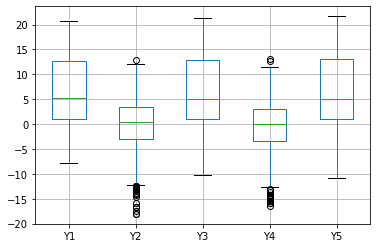

In [387]:
base_ts.boxplot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

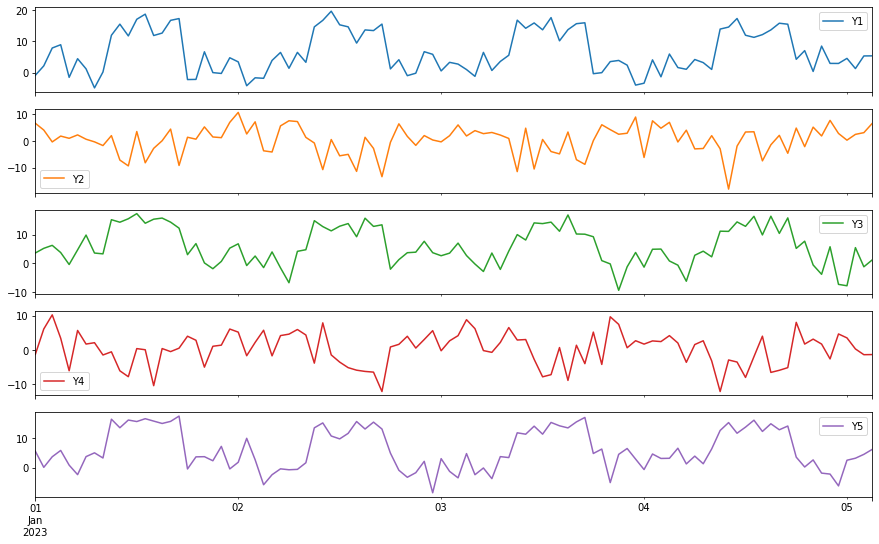

In [388]:
base_ts.head(100).plot(subplots=True, figsize=(15,9))

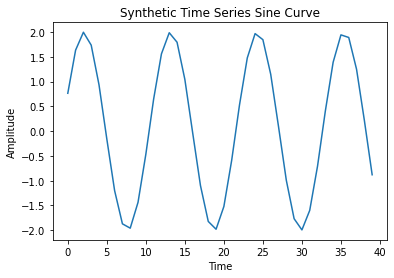

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
amplitude = 2.0
frequency = 0.09 # This determines the period of the wave
phase = np.pi / 8 # This shifts the wave to the right or left

# Define the time interval and the number of data points
time_index = pd.date_range(start=start_date, end=end_date, freq=freq).tolist()
t = np.arange(0, 40, 1)

#print(t)
n = len(t)

# Generate the synthetic time series data
data = amplitude * np.sin(2 * np.pi * frequency* t  + phase)
#print(data)

# Plot the data
plt.plot(t, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Synthetic Time Series Sine Curve')
plt.show()


In [44]:
t1=np.zeros(len(time_index))
print(type(t1))

<class 'numpy.ndarray'>


In [389]:
train_data = base_ts.iloc[:72,0]
print(train_data)

In [391]:
train_data.shape

(72,)

In [434]:
# Fit the Holt-Winters model to the training data
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=24)
fitted_model = model.fit()

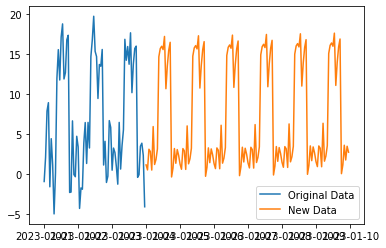

In [435]:
# Generate new time series data with existing data
forecast = fitted_model.forecast(144)
new_data = forecast 
plt.plot(base_ts.iloc[:72].index, base_ts.iloc[:72,0], label='Original Data')
plt.plot(forecast.index, new_data, label='New Data')
plt.legend()
plt.show()

In [408]:
forecast.head(24)

2023-01-04 00:00:00     1.175456
2023-01-04 01:00:00     0.548455
2023-01-04 02:00:00     3.128456
2023-01-04 03:00:00     2.841456
2023-01-04 04:00:00     0.528457
2023-01-04 05:00:00     5.959790
2023-01-04 06:00:00     1.226457
2023-01-04 07:00:00     1.864122
2023-01-04 08:00:00     3.168456
2023-01-04 09:00:00    14.674123
2023-01-04 10:00:00    15.693790
2023-01-04 11:00:00    15.984789
2023-01-04 12:00:00    15.574123
2023-01-04 13:00:00    17.213789
2023-01-04 14:00:00    10.686123
2023-01-04 15:00:00    13.561122
2023-01-04 16:00:00    15.495789
2023-01-04 17:00:00    16.481123
2023-01-04 18:00:00    -0.332211
2023-01-04 19:00:00     0.780790
2023-01-04 20:00:00     3.216789
2023-01-04 21:00:00     1.373456
2023-01-04 22:00:00     3.087790
2023-01-04 23:00:00     2.346456
Freq: H, dtype: float64

<AxesSubplot:>

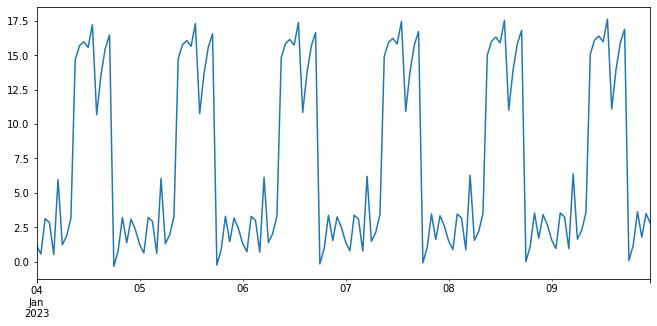

In [442]:
new_data.plot(figsize=(11,5))

In [410]:
forecast.iloc[24:48]

2023-01-05 00:00:00     1.257851
2023-01-05 01:00:00     0.630850
2023-01-05 02:00:00     3.210851
2023-01-05 03:00:00     2.923850
2023-01-05 04:00:00     0.610851
2023-01-05 05:00:00     6.042184
2023-01-05 06:00:00     1.308851
2023-01-05 07:00:00     1.946516
2023-01-05 08:00:00     3.250850
2023-01-05 09:00:00    14.756517
2023-01-05 10:00:00    15.776184
2023-01-05 11:00:00    16.067183
2023-01-05 12:00:00    15.656518
2023-01-05 13:00:00    17.296184
2023-01-05 14:00:00    10.768518
2023-01-05 15:00:00    13.643517
2023-01-05 16:00:00    15.578184
2023-01-05 17:00:00    16.563518
2023-01-05 18:00:00    -0.249816
2023-01-05 19:00:00     0.863184
2023-01-05 20:00:00     3.299184
2023-01-05 21:00:00     1.455851
2023-01-05 22:00:00     3.170184
2023-01-05 23:00:00     2.428851
Freq: H, dtype: float64

In [112]:
np.random.normal(loc=6, scale=sigma, size=24)

array([5.73474949, 6.18351522, 6.43371695, 6.03994982, 5.61569919,
       5.91254167, 6.37361604, 6.40159125, 5.88994065, 5.88069123,
       5.74171106, 5.75681061, 5.21427464, 6.44062611, 4.74757471,
       5.38409873, 6.0774726 , 6.07905522, 5.79338473, 4.99649529,
       5.66033795, 5.55969286, 4.29179337, 6.64673305])

In [2]:
import datetime
#import holidays

# Define the time range
start_date = datetime.date(2023, 3, 1)
end_date = datetime.date(2023, 3, 31)

In [4]:
print(start_date)

2023-03-01


In [8]:
!pip install holidays

  Created wheel for PyMeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=7f17653a1568e60736d9341694a528b3c711e47d6d182ac7c780a48f494d3a20
  Stored in directory: c:\users\sowmiya.sivakumar\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built PyMeeus


In [14]:
import pandas as pd
import numpy as np
import datetime
import holidays

# Define the time range
start_date = datetime.date(2022, 11, 1)
end_date = datetime.date(2023, 3, 31)

# Identify weekends and holidays
us_holidays = holidays.US()  # or use any other country's holiday calendar
weekends = [5, 6]  # Saturday = 5, Sunday = 6
holidays = [date for date in us_holidays.keys() if start_date <= date <= end_date]
print(holidays)



[]


In [15]:
# Determine working hours
start_time = datetime.time(9, 0)
end_time = datetime.time(17, 0)
time_range = pd.date_range(start=datetime.datetime.combine(start_date, start_time),
                           end=datetime.datetime.combine(end_date, end_time),
                           freq='H')
print(time_range)
# Filter out weekends and holidays
time_range = time_range[~time_range.weekday.isin(weekends)]
time_range = time_range[~time_range.isin(holidays)]

timestamps = time_range.tolist()

#print(timestamps)

DatetimeIndex(['2022-11-01 09:00:00', '2022-11-01 10:00:00',
               '2022-11-01 11:00:00', '2022-11-01 12:00:00',
               '2022-11-01 13:00:00', '2022-11-01 14:00:00',
               '2022-11-01 15:00:00', '2022-11-01 16:00:00',
               '2022-11-01 17:00:00', '2022-11-01 18:00:00',
               ...
               '2023-03-31 08:00:00', '2023-03-31 09:00:00',
               '2023-03-31 10:00:00', '2023-03-31 11:00:00',
               '2023-03-31 12:00:00', '2023-03-31 13:00:00',
               '2023-03-31 14:00:00', '2023-03-31 15:00:00',
               '2023-03-31 16:00:00', '2023-03-31 17:00:00'],
              dtype='datetime64[ns]', length=3609, freq='H')


In [19]:
import pandas as pd
import numpy as np
import datetime
import holidays

# Define the time range
start_date = datetime.date(2023, 3, 1)
end_date = datetime.date(2023, 3, 31)

# Identify weekends and holidays
us_holidays = holidays.US()  # or use any other country's holiday calendar
weekends = [5, 6]  # Saturday = 5, Sunday = 6
holidays = [date for date in us_holidays.keys() if start_date <= date <= end_date]

# Determine working hours
start_time = datetime.time(9, 0)
end_time = datetime.time(17, 0)

# Create time series data with business hours frequency
business_dates = pd.date_range(start=start_date, end=end_date, freq='B')
business_hours = pd.date_range(start=datetime.datetime.combine(start_date, start_time),
                               end=datetime.datetime.combine(end_date, end_time),
                               freq='H')
index = business_hours[business_hours.isin(business_dates)]
ts = pd.Series(np.random.randn(len(index)), index=index)

# Filter out weekends and holidays
ts = ts[~ts.index.weekday.isin(weekends)]
#ts = ts[~ts.index.date.isin(holidays)]

print(business_hours)


DatetimeIndex(['2023-03-01 09:00:00', '2023-03-01 10:00:00',
               '2023-03-01 11:00:00', '2023-03-01 12:00:00',
               '2023-03-01 13:00:00', '2023-03-01 14:00:00',
               '2023-03-01 15:00:00', '2023-03-01 16:00:00',
               '2023-03-01 17:00:00', '2023-03-01 18:00:00',
               ...
               '2023-03-31 08:00:00', '2023-03-31 09:00:00',
               '2023-03-31 10:00:00', '2023-03-31 11:00:00',
               '2023-03-31 12:00:00', '2023-03-31 13:00:00',
               '2023-03-31 14:00:00', '2023-03-31 15:00:00',
               '2023-03-31 16:00:00', '2023-03-31 17:00:00'],
              dtype='datetime64[ns]', length=729, freq='H')
